# Task 1--- Web scraping and analysis

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):


    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"Scraping page {i} {len(reviews)} total reviews")

Scraping page 1 100 total reviews
Scraping page 2 200 total reviews
Scraping page 3 300 total reviews
Scraping page 4 400 total reviews
Scraping page 5 500 total reviews
Scraping page 6 600 total reviews
Scraping page 7 700 total reviews
Scraping page 8 800 total reviews
Scraping page 9 900 total reviews
Scraping page 10 1000 total reviews
Scraping page 11 1100 total reviews
Scraping page 12 1200 total reviews
Scraping page 13 1300 total reviews
Scraping page 14 1400 total reviews
Scraping page 15 1500 total reviews
Scraping page 16 1600 total reviews
Scraping page 17 1700 total reviews
Scraping page 18 1800 total reviews
Scraping page 19 1900 total reviews
Scraping page 20 2000 total reviews
Scraping page 21 2100 total reviews
Scraping page 22 2200 total reviews
Scraping page 23 2300 total reviews
Scraping page 24 2400 total reviews
Scraping page 25 2500 total reviews
Scraping page 26 2600 total reviews
Scraping page 27 2700 total reviews
Scraping page 28 2800 total reviews
Scraping p

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Worst experience of my life...
1,✅ Trip Verified | Due to code sharing with Ca...
2,✅ Trip Verified | LHR check in was quick at t...
3,✅ Trip Verified | I wouldn't recommend Britis...
4,✅ Trip Verified | Absolutely horrible experie...


In [4]:
df

,reviews
0,✅ Trip Verified | Worst experience of my life...
1,✅ Trip Verified | Due to code sharing with Ca...
2,✅ Trip Verified | LHR check in was quick at t...
3,✅ Trip Verified | I wouldn't recommend Britis...
4,✅ Trip Verified | Absolutely horrible experie...
...,...
2995,Miami to Brussels with a change at Heathrow te...
2996,LGW-CUN Club World seat 4A. To be honest I was...
2997,Recently completed a round-trip LGW-Barcelona....
2998,LHR-HKG-LHR in First. A brief trip to celebrat...


In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [6]:
df

,reviews
0,Worst experience of my life trying to deal w...
1,Due to code sharing with Cathay Pacific I wa...
2,LHR check in was quick at the First Wing and...
3,I wouldn't recommend British Airways at all....
4,Absolutely horrible experience. I booked a t...
...,...
2995,None
2996,None
2997,None
2998,None


In [7]:
df.isna().sum()

reviews    995
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df

,reviews
0,Worst experience of my life trying to deal w...
1,Due to code sharing with Cathay Pacific I wa...
2,LHR check in was quick at the First Wing and...
3,I wouldn't recommend British Airways at all....
4,Absolutely horrible experience. I booked a t...
...,...
2173,Istanbul to London Heathrow with British Air...
2174,London Heathrow to Houston on British Airway...
2175,We have flown with British Airways over 100 ...
2176,British Airways from Seattle to Johannesburg...


# Cleaning the text

In [10]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_6808\1946503575.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned Reviews'] = df['reviews'].apply(clean)


,reviews,Cleaned Reviews
0,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...
1,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...
2,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...
3,I wouldn't recommend British Airways at all....,I wouldn t recommend British Airways at all I...
4,Absolutely horrible experience. I booked a t...,Absolutely horrible experience I booked a tic...


Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

In [11]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Enrichment –-> POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

Stopwords removal-->
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

In [12]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
C:\Users\USER\AppData\Local\Temp\ipykernel_6808\3864914057.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)


,reviews,Cleaned Reviews,POS tagged
0,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi..."
1,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...,"[(Due, a), (code, v), (sharing, v), (Cathay, n..."
2,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...,"[(LHR, n), (check, n), (quick, a), (First, n),..."
3,I wouldn't recommend British Airways at all....,I wouldn t recommend British Airways at all I...,"[(recommend, v), (British, a), (Airways, n), (..."
4,Absolutely horrible experience. I booked a t...,Absolutely horrible experience I booked a tic...,"[(Absolutely, r), (horrible, a), (experience, ..."


Obtaining the stem words-->
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [13]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_6808\3303090191.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lemma'] = df['POS tagged'].apply(lemmatize)


,reviews,Cleaned Reviews,POS tagged,Lemma
0,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi...",Worst experience life try deal customer serv...
1,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...,"[(Due, a), (code, v), (sharing, v), (Cathay, n...",Due code share Cathay Pacific downgrade BA r...
2,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...,"[(LHR, n), (check, n), (quick, a), (First, n),...",LHR check quick First Wing quickly security ...
3,I wouldn't recommend British Airways at all....,I wouldn t recommend British Airways at all I...,"[(recommend, v), (British, a), (Airways, n), (...",recommend British Airways try call customer ...
4,Absolutely horrible experience. I booked a t...,Absolutely horrible experience I booked a tic...,"[(Absolutely, r), (horrible, a), (experience, ...",Absolutely horrible experience book ticket E...


In [14]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Worst experience of my life trying to deal w...,Worst experience life try deal customer serv...
1,Due to code sharing with Cathay Pacific I wa...,Due code share Cathay Pacific downgrade BA r...
2,LHR check in was quick at the First Wing and...,LHR check quick First Wing quickly security ...
3,I wouldn't recommend British Airways at all....,recommend British Airways try call customer ...
4,Absolutely horrible experience. I booked a t...,Absolutely horrible experience book ticket E...
...,...,...
2173,Istanbul to London Heathrow with British Air...,Istanbul London Heathrow British Airways mai...
2174,London Heathrow to Houston on British Airway...,London Heathrow Houston British Airways frie...
2175,We have flown with British Airways over 100 ...,fly British Airways time usually business cl...
2176,British Airways from Seattle to Johannesburg...,British Airways Seattle Johannesburg via Lon...


# Sentiment Analysis using VADER

In [15]:
!pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 1.8 MB/s eta 0:00:00


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_6808\1047578220.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)
C:\Users\USER\AppData\Local\Temp\ipykernel_6808\1047578220.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Analysis'] = df['Sentiment'].apply(vader_analysis)


,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi...",Worst experience life try deal customer serv...,-0.9324,Negative
1,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...,"[(Due, a), (code, v), (sharing, v), (Cathay, n...",Due code share Cathay Pacific downgrade BA r...,-0.5369,Negative
2,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...,"[(LHR, n), (check, n), (quick, a), (First, n),...",LHR check quick First Wing quickly security ...,0.9454,Positive
3,I wouldn't recommend British Airways at all....,I wouldn t recommend British Airways at all I...,"[(recommend, v), (British, a), (Airways, n), (...",recommend British Airways try call customer ...,0.2023,Neutral
4,Absolutely horrible experience. I booked a t...,Absolutely horrible experience I booked a tic...,"[(Absolutely, r), (horrible, a), (experience, ...",Absolutely horrible experience book ticket E...,-0.9500,Negative


In [17]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    1061
Negative     721
Neutral      223
Name: Analysis, dtype: int64

In [ ]:
df.to_csv("BA_reviews.csv")

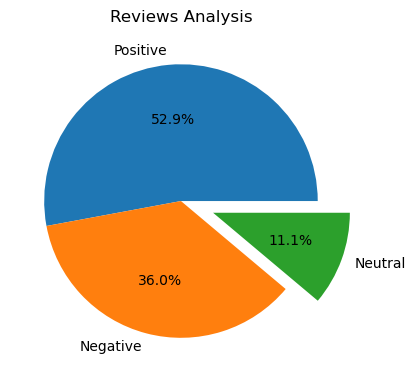

In [21]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()

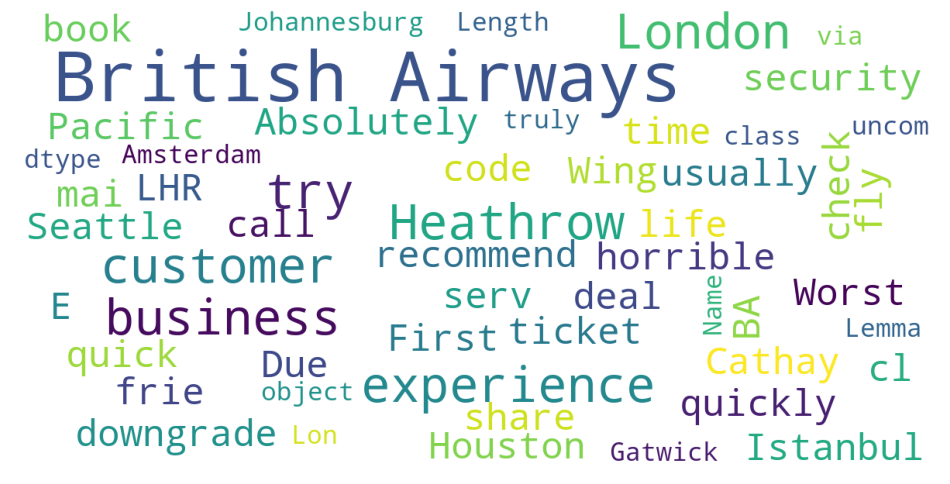

In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)